In [1]:
import pickle as pkl
import pprint

import numpy as np
import pandas as pd

from sklearn import preprocessing, metrics

import matplotlib.pyplot as plt

import torch
import torchtext
from torchtext.models import RobertaClassificationHead, XLMR_BASE_ENCODER

In [2]:
with open('/kaggle/input/ds-official-models-500/log_0.pkl', 'rb') as f:
    pprint.pprint(pkl.load(f))

{'avg_training_losses': [0.10459195822477341,
                         0.09977320581674576,
                         0.10270342230796814,
                         0.09986265748739243,
                         0.10010701417922974,
                         0.09872741997241974,
                         0.10244099795818329,
                         0.1013910248875618,
                         0.10079371929168701,
                         0.1007085070014,
                         0.09792941808700562,
                         0.1004740372300148,
                         0.10012243688106537,
                         0.10080665349960327,
                         0.10126035660505295,
                         0.09664689749479294,
                         0.10008326172828674,
                         0.09688824415206909,
                         0.09521947056055069,
                         0.10236003249883652,
                         0.1013568714261055,
                         0.09645521640777

In [3]:
means_avg_training_losses = list()
accuracies = list()
macro_f1_scores = list()
weighted_f1_scores = list()

for i in range(500):
    with open(f'/kaggle/input/ds-official-models-500/log_{i}.pkl', 'rb') as f:
        log_dict = pkl.load(f)
        means_avg_training_losses.append(np.mean(log_dict['avg_training_losses']))
        accuracies.append(log_dict['classification_report']['accuracy'])
        macro_f1_scores.append(log_dict['classification_report']['macro avg']['f1-score'])
        weighted_f1_scores.append(log_dict['classification_report']['weighted avg']['f1-score'])

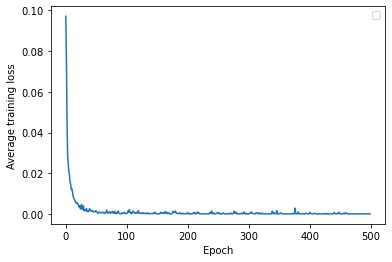

In [4]:
plt.plot(means_avg_training_losses)
plt.xlabel('Epoch')
plt.ylabel('Average training loss')
plt.legend()
plt.savefig('avg training loss.png', dpi=200)

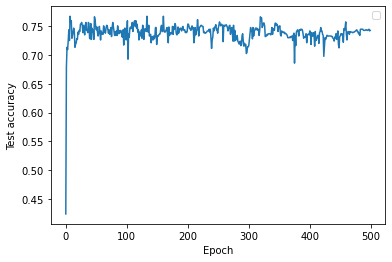

In [5]:
plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
plt.legend()
plt.savefig('test accuracy.png', dpi=200)

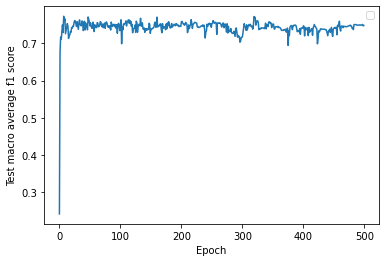

In [6]:
plt.plot(macro_f1_scores)
plt.xlabel('Epoch')
plt.ylabel('Test macro average f1 score')
plt.legend()
plt.savefig('test macro avg f1.png', dpi=200)

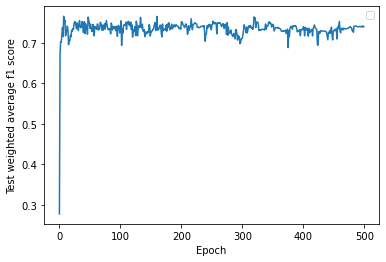

In [7]:
plt.plot(weighted_f1_scores)
plt.xlabel('Epoch')
plt.ylabel('Test weighted average f1 score')
plt.legend()
plt.savefig('test weighted avg f1.png', dpi=200)

In [8]:
label_map = {
    0: 'insult',
    1: 'neutral',
    2: 'politics',
    3: 'religion',
    4: 'terrorism'
}

label_list = list(label_map[i] for i in range(5))
label_list

['insult', 'neutral', 'politics', 'religion', 'terrorism']

In [9]:
with open('/kaggle/input/ds-official-models-500/log_post_train_info.pkl', 'rb') as f:
    post_train_info = pkl.load(f)
    pprint.pprint(post_train_info)

{'max_accuracy': 0.7674190382728164,
 'max_accuracy_index': 7,
 'max_macro_f1': 0.7722383172008185,
 'max_macro_f1_index': 319,
 'max_weighted_f1': 0.7653015921461614,
 'max_weighted_f1_index': 160}


{'0': {'f1-score': 0.92,
       'precision': 0.9435897435897436,
       'recall': 0.8975609756097561,
       'support': 205},
 '1': {'f1-score': 0.6351084812623274,
       'precision': 0.679324894514768,
       'recall': 0.5962962962962963,
       'support': 270},
 '2': {'f1-score': 0.6376021798365122,
       'precision': 0.6062176165803109,
       'recall': 0.6724137931034483,
       'support': 174},
 '3': {'f1-score': 0.8,
       'precision': 0.8854961832061069,
       'recall': 0.7295597484276729,
       'support': 159},
 '4': {'f1-score': 0.8607594936708861,
       'precision': 0.7756653992395437,
       'recall': 0.966824644549763,
       'support': 211},
 'accuracy': 0.7674190382728164,
 'macro avg': {'f1-score': 0.7706940309539452,
               'precision': 0.7780587674260946,
               'recall': 0.7725310915973873,
               'support': 1019},
 'weighted avg': {'f1-score': 0.7653015921461614,
                  'precision': 0.772124412766608,
                  'recall

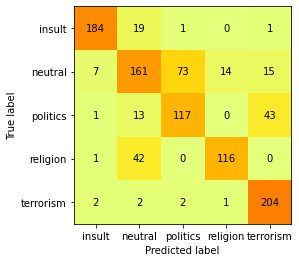

In [10]:
DEMO_MODEL_PATH = '/kaggle/input/ds-official-models-500/model_max_weighted_f1.pth'
max_weighted_f1_index = post_train_info['max_weighted_f1_index']

with open(f'/kaggle/input/ds-official-models-500/log_{max_weighted_f1_index}.pkl', 'rb') as f:
    log = pkl.load(f)
    confusion_matrix = log['confusion_matrix']
    pprint.pprint(log['classification_report'])
    pprint.pprint(confusion_matrix)
    
    fig, ax = plt.subplots()
    plt.imshow(confusion_matrix, cmap='Wistia')
    
    ax.set_xticks(range(5), labels=label_list)
    ax.set_yticks(range(5), labels=label_list)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    
    for i in range(5):
        for j in range(5):
            text = ax.text(j, i, confusion_matrix[i, j],
                          ha="center", va="center", color="black")
    
    plt.savefig('conf matrix of max weighted f1 model.png', dpi=200)

In [11]:
num_classes = 5
input_dim = 768

classifier_head = RobertaClassificationHead(num_classes=num_classes, input_dim=input_dim)
model = XLMR_BASE_ENCODER.get_model(head=classifier_head)

Downloading: "https://download.pytorch.org/models/text/xlmr.base.encoder.pt" to /root/.cache/torch/hub/checkpoints/xlmr.base.encoder.pt


  0%|          | 0.00/1.03G [00:00<?, ?B/s]

In [12]:
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
DEVICE

device(type='cuda')

In [13]:
model.load_state_dict(
    torch.load(DEMO_MODEL_PATH)
)
model.to(DEVICE)

pass

In [14]:
padding_idx = 1
bos_idx = 0
eos_idx = 2
max_seq_len = 256

text_transform = torchtext.models.XLMR_LARGE_ENCODER.transform()

100%|██████████| 5.07M/5.07M [00:01<00:00, 3.05MB/s]
Downloading: "https://download.pytorch.org/models/text/xlmr.vocab.pt" to /root/.cache/torch/hub/checkpoints/xlmr.vocab.pt


  0%|          | 0.00/4.85M [00:00<?, ?B/s]

In [15]:
inp = "Jordan’s remarks come in the wake of the new GOP majority in the House"
transformed_text = text_transform(inp)
out = model(torch.tensor([transformed_text]).to(DEVICE))
label_map[torch.argmax(out).item()]

'politics'